# Decision analysis with `rdecision` using Petitti, 2000, 2e. - Chapter 2 
Chapter 2 from Petitti, Diana B. Meta-Analysis, Decision Analysis, and Cost-Effectiveness Analysis: Methods for Quantitative Synthesis in Medicine. 2nd ed. Monographs in Epidemiology and Biostatistics, v. 31. Oxford University Press, 2000. https://doi.org/10.1093/acprof:oso/9780195133646.001.0001.


This R notebook was created in VS Code and contains examples from Petitti 2000, Chapter 2 using R code. 

We will use `rdecision` R package: https://cran.r-project.org/web/packages/rdecision/index.html

Preparation:
- Read [Section 2.2 of Chapter 2](https://github.com/tomasaragon/di4h/blob/main/files/Petitti_2000_isbn_9780195133646_ch02.pdf) in Petitti 2000 book. 
- Review [Introduction to the construction of decision trees](https://cran.r-project.org/web/packages/rdecision/vignettes/DT00-DecisionTreeTutorial.html) from the `rdecision` package CRAN page.  

A decision tree is equivalent to an influence diagram, and both have nodes and edges. 

Nodes are variables and include:
- **Decision** nodes (represented as squares)
- **Chance** nodes (represented as circles)
- **Leaf** nodes (also called terminal, utility, or value nodes)

Edges connect nodes and include:
- **Action** edges eminating from decision nodes
- **Reaction** edges eminating from chance nodes

In `rdecision`, here key functions and their arguments:
- `DecisionNode$new(label = "")`
- `ChanceNode$new(label = "")`
- `LeafNode$new(label = "", utility = 0)`
- `Action$new(source_node, target_node, label, cost = 0, benefit = 0)`   

## Drawing Figure 2-1 from Petitti 2000 book
Figure 2-1 from Petitti 2000 book is reproduced below using `rdecision` package. 

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-1.png" width="600" alt="Petitti 2000 Figure 2-1"/>

Moving from left to right and top to bottom I label the nodes and edges as follows:
- d1, etc. for one or more decision nodes
- c1, c2, etc. for chance nodes
- e1, e2, etc. for edges (actions or reactions)
- t1, t2, etc. for terminal (leaf) nodes

This makes writing and following the R code easier.

Figure 2-1 is displayed below, but now with my labels (d1, c1, e1, t1, etc.) added.

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-1_annotated.png" width="600" alt="Petitti 2000 Figure 2-1"/>

Now we can create the decision tree in R using the `rdecision` package. I create all the nodes first, then the edges, and finally the decision tree object. This works because the nodes must exist before they can be connected by edges.  

In [2]:
library(rdecision)

In [ ]:
# create all nodes first
## terminal nodes
t1 = LeafNode$new("outcome 1")
t2 = LeafNode$new("outcome 2")
t3 = LeafNode$new("outcome 3") 
t4 = LeafNode$new("outcome 4")

## chance nodes
c1 = ChanceNode$new("Chance Node (c1)")
c2 = ChanceNode$new("Chance Node (c2)")

## decision node
d1 = DecisionNode$new("Decision Node (d1)")

# create edges after nodes
## edges
e1 = Action$new(d1, c1, label = "Decision Option (e1)")
e2 = Action$new(d1, c2, label = "Alternative Action (e2)")
e3 = Reaction$new(c1, t1, label = "Event 1 (e3)")
e4 = Reaction$new(c1, t2, label = "Event 2 (e4)")
e5 = Reaction$new(c2, t3, label = "Event 3 (e5)")
e6 = Reaction$new(c2, t4, label = "Event 4 (e6)")

# create lists of nodes (aka, vertices) and edges
V = list(
  d1, c1, c2, t1, t2, t3, t4
)
E = list(
  e1, e2, e3, e4, e5, e6
)

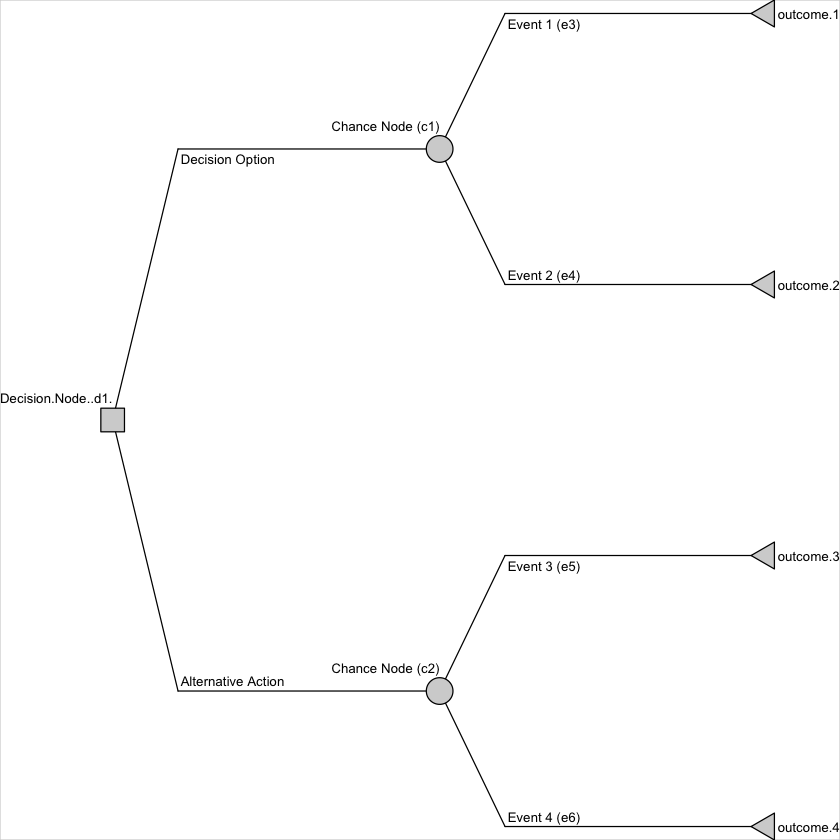

In [9]:
# tree
dt = DecisionTree$new(V, E)
dt$draw(border = TRUE)

Yeah! We can see how simple it is to create decision trees using `rdecision` package.

## Re-vaccinate for measles? (Figures 2-2 $-$ 2-6)

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-2.png" width="400" alt="Petitti 2000 Figure 2-2"/>

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-3.png" width="600" alt="Petitti 2000 Figure 2-3"/>

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-4.png" width="600" alt="Petitti 2000 Figure 2-4"/>

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-5.png" width="800" alt="Petitti 2000 Figure 2-5"/>

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-6.png" width="800" alt="Petitti 2000 Figure 2-6"/>

<img src="Petitti_2000_isbn_9780195133646_ch02_fig2-6_annotated.png" width="800" alt="Petitti 2000 Figure 2-6"/>

In [1]:
library(rdecision)

In [15]:
# create all nodes first
## terminal nodes
t01 = LeafNode$new("dead (t01)", utility = 0)
t02 = LeafNode$new("well (t02)", utility = 1)
t03 = LeafNode$new("dead (t03)", utility = 0) 
t04 = LeafNode$new("well (t04)", utility = 1)
t05 = LeafNode$new("dead (t05)", utility = 0)
t06 = LeafNode$new("well (t06)", utility = 1)
t07 = LeafNode$new("dead (t07)", utility = 0) 
t08 = LeafNode$new("well (t08)", utility = 1)
t09 = LeafNode$new("dead (t09)", utility = 0)
t10 = LeafNode$new("well (t10)", utility = 1)
t11 = LeafNode$new("dead (t11)", utility = 0) 
t12 = LeafNode$new("well (t12)", utility = 1)
t13 = LeafNode$new("dead (t13)", utility = 0)
t14 = LeafNode$new("well (t14)", utility = 1)
t15 = LeafNode$new("dead (t15)", utility = 0) 
t16 = LeafNode$new("well (t16)", utility = 0)

## chance nodes
c01 = ChanceNode$new("Exposure (c01)")
c02 = ChanceNode$new("Exposure (c02)")

c03 = ChanceNode$new("Infection (c03)")
c04 = ChanceNode$new("Infection (c04)")
c05 = ChanceNode$new("Infection (c05)")
c06 = ChanceNode$new("Infection (c06)")

c07 = ChanceNode$new("Status (c07)")
c08 = ChanceNode$new("Status (c08)")
c09 = ChanceNode$new("Status (c09)")
c10 = ChanceNode$new("Status (c10)")
c11 = ChanceNode$new("Status (c11)")
c12 = ChanceNode$new("Status (c12)")
c13 = ChanceNode$new("Status (c13)")
c14 = ChanceNode$new("Status (c14)")

## decision node
d01  = DecisionNode$new("Decision Node (d01)")

# create edges after nodes
## edges
e01 = Action$new(d01, c01, label = "Re-vaccinate (e01)")
e02 = Action$new(d01, c02, label = "Don't Re-vaccinate (e02)")

e03 = Reaction$new(c01, c03, p = 0.20, label = "Exposed (e03)")
e04 = Reaction$new(c01, c04, p = 0.80, label = "Not Exposed (e04)")
e05 = Reaction$new(c02, c05, p = 0.20, label = "Exposed (e05)")
e06 = Reaction$new(c02, c06, p = 0.80, label = "Not Exposed (e06)")

e07 = Reaction$new(c03, c07, p = 0.05, label = "Measles (e07)")
e08 = Reaction$new(c03, c08, p = 0.95, label = "No measles (e08)")
e09 = Reaction$new(c04, c09, p = 0.00, label = "Measles (e09)")
e10 = Reaction$new(c04, c10, p = 1.00, label = "No measles (e10)")
e11 = Reaction$new(c05, c11, p = 0.33, label = "Measles (e11)")
e12 = Reaction$new(c05, c12, p = 0.67, label = "No measles (e12)")
e13 = Reaction$new(c06, c13, p = 0.00, label = "Measles (e13)")
e14 = Reaction$new(c06, c14, p = 1.00, label = "No measles (e14)")

e15 = Reaction$new(c07, t01, p = 0.0023, label = "Die (e15)")
e16 = Reaction$new(c07, t02, p = 0.9977, label = "Live (e16)")
e17 = Reaction$new(c08, t03, p = 0.0, label = "Die (e17)")
e18 = Reaction$new(c08, t04, p = 1.0, label = "Live (e18)")
e19 = Reaction$new(c09, t05, p = 0.0023, label = "Die (e19)")
e20 = Reaction$new(c09, t06, p = 0.9977, label = "Live (e20)")
e21 = Reaction$new(c10, t07, p = 0.0, label = "Die (e21)")
e22 = Reaction$new(c10, t08, p = 1.0, label = "Live (e22)")
e23 = Reaction$new(c11, t09, p = 0.0023, label = "Die (e23)")
e24 = Reaction$new(c11, t10, p = 0.9977, label = "Live (e24)")
e25 = Reaction$new(c12, t11, p = 0.0, label = "Die (e25)")
e26 = Reaction$new(c12, t12, p = 1.0, label = "Live (e26)")
e27 = Reaction$new(c13, t13, p = 0.0023, label = "Die (e27)")
e28 = Reaction$new(c13, t14, p = 0.9977, label = "Live (e28)")
e29 = Reaction$new(c14, t15, p = 0.0, label = "Die (e29)")
e30 = Reaction$new(c14, t16, p = 1.0, label = "Live (e30)")

# create lists of nodes (aka, vertices) and edges
V = list(
  d01,
  c01, c02,
  c03, c04, c05, c06,
  c07, c08, c09, c10, c11, c12, c13, c14,
  t01, t02, t03, t04, t05, t06, t07, t08,
  t09, t10, t11, t12, t13, t14, t15, t16
)
E = list(
  e01, e02,
  e03, e04, e05, e06,
  e07, e08, e09, e10, e11, e12, e13, e14,
  e15, e16, e17, e18, e19, e20,
  e21, e22, e23, e24, e25, e26,
  e27, e28, e29, e30
)

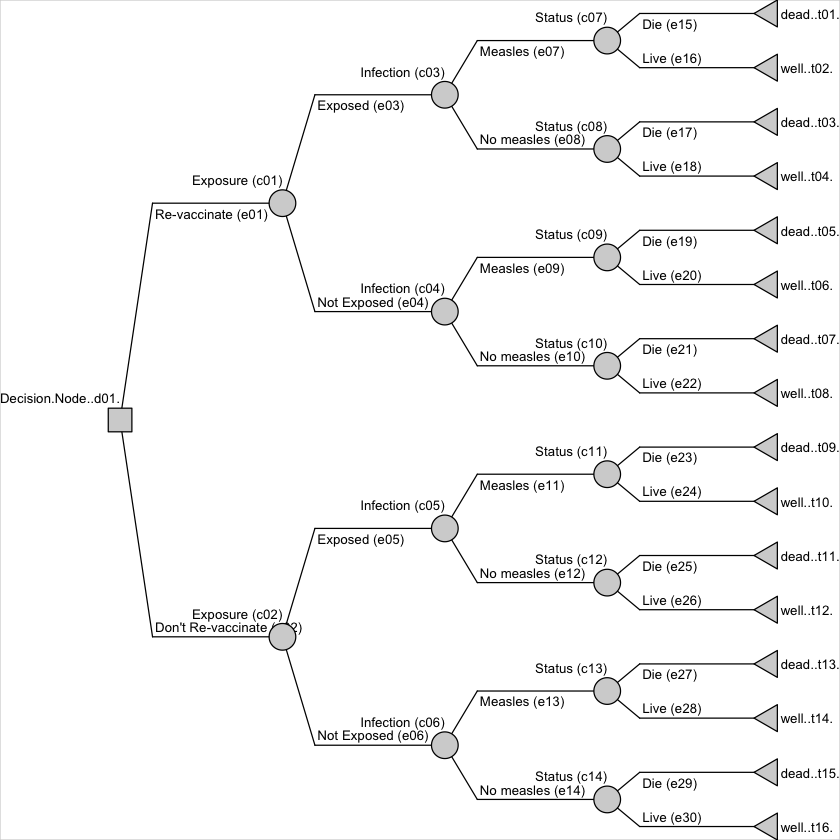

In [16]:
# tree
dt = DecisionTree$new(V, E)
dt$draw(border = TRUE)

In [18]:
dt$evaluate()

Run,Decision.Node..d01.,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Don't Re-vaccinate (e02),1,0,0,0.1998482,0.1998482
1,Re-vaccinate (e01),1,0,0,0.9999770,0.9999770


## Analysis from `rdecision` tutorial 



### Model variables

In [1]:
library(rdecision)

In [2]:
# Time horizon
thz <- as.difftime(24L, units = "hours") # changed th to thz to avoid conflict later

# model variables for cost
c_sumatriptan <- 16.10
c_caffeine <- 1.32
c_ed <- 63.16
c_admission <- 1093.0

# model variables for utility
u_relief_norecurrence <- 1.0
u_relief_recurrence <- 0.9
u_norelief_endures <- -0.30
u_norelief_er <- 0.1

# model variables for effect
p_sumatriptan_recurrence <- 0.594
p_caffeine_recurrence <- 0.703
p_sumatriptan_relief <- 0.558
p_caffeine_relief <- 0.379
p_er <- 0.08
p_admitted <- 0.002

### Constructing the tree

In [3]:
# Sumatriptan branch
ta <- LeafNode$new("A", utility = u_relief_norecurrence, interval = thz)
tb <- LeafNode$new("B", utility = u_relief_recurrence, interval = thz)
c3 <- ChanceNode$new()
e1 <- Reaction$new(
  c3, ta, p = p_sumatriptan_recurrence, label = "No recurrence"
)
e2 <- Reaction$new(
  c3, tb, p = NA_real_, cost = c_sumatriptan, label = "Relieved 2nd dose"
)
td <- LeafNode$new("D", utility = u_norelief_er, interval = thz)
te <- LeafNode$new("E", utility = u_norelief_endures, interval = thz)
c7 <- ChanceNode$new()
e3 <- Reaction$new(c7, td, p = NA_real_, label = "Relief")
e4 <- Reaction$new(
  c7, te, p = p_admitted, cost = c_admission, label = "Hospitalization"
)

tc <- LeafNode$new("C", utility = u_norelief_endures, interval = thz)
c4 <- ChanceNode$new()
e5 <- Reaction$new(c4, tc, p = NA_real_, label = "Endures attack")
e6 <- Reaction$new(c4, c7, p = p_er, cost = c_ed, label = "ER")

c1 <- ChanceNode$new()
e7 <- Reaction$new(c1, c3, p = p_sumatriptan_relief, label = "Relief")
e8 <- Reaction$new(c1, c4, p = NA_real_, label = "No relief")

# Caffeine/Ergotamine branch
tf <- LeafNode$new("F", utility = u_relief_norecurrence, interval = thz)
tg <- LeafNode$new("G", utility = u_relief_recurrence, interval = thz)
c5 <- ChanceNode$new()
e9 <- Reaction$new(c5, tf, p = p_caffeine_recurrence, label = "No recurrence")
e10 <- Reaction$new(
  c5, tg, p = NA_real_, cost = c_caffeine, label = "Relieved 2nd dose"
)
ti <- LeafNode$new("I", utility = u_norelief_er, interval = thz)
tj <- LeafNode$new("J", utility = u_norelief_endures, interval = thz)
c8 <- ChanceNode$new()
e11 <- Reaction$new(c8, ti, p = NA_real_, label = "Relief")
e12 <- Reaction$new(
  c8, tj, p = p_admitted, cost = c_admission, label = "Hospitalization"
)

th <- LeafNode$new("H", utility = u_norelief_endures, interval = thz)
c6 <- ChanceNode$new()
e13 <- Reaction$new(c6, th, p = NA_real_, label = "Endures attack")
e14 <- Reaction$new(c6, c8, p = p_er, cost = c_ed, label = "ER")

c2 <- ChanceNode$new()
e15 <- Reaction$new(c2, c5, p = p_caffeine_relief, label = "Relief")
e16 <- Reaction$new(c2, c6, p = NA_real_, label = "No relief")

# decision node
d1 <- DecisionNode$new("d1")
e17 <- Action$new(d1, c1, cost = c_sumatriptan, label = "Sumatriptan")
e18 <- Action$new(d1, c2, cost = c_caffeine, label = "Caffeine-Ergotamine")

# create lists of nodes and edges
V <- list(
  d1, c1, c2, c3, c4, c5, c6, c7, c8,
  ta, tb, tc, td, te, tf, tg, th, ti, tj
)
E <- list(
  e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16,
  e17, e18
)

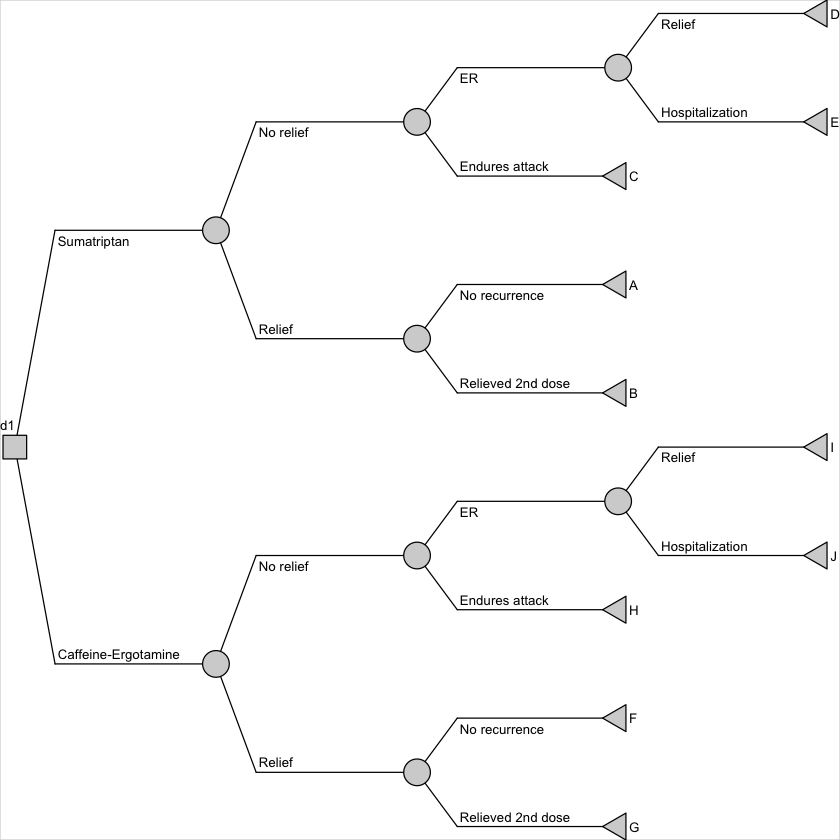

In [4]:
# tree
dt <- DecisionTree$new(V, E)
dt$draw(border = TRUE)

In [5]:
ep <- dt$evaluate(by = "path")
ep

Run,d1,Leaf,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Caffeine-Ergotamine,F,0.26643700,0.35169684,0,0.266437000,7.294648e-04
1,Caffeine-Ergotamine,G,0.11256300,0.29716632,0,0.101306700,2.773626e-04
1,Caffeine-Ergotamine,H,0.57132000,0.75414240,0,-0.171396000,-4.692567e-04
1,Caffeine-Ergotamine,I,0.04958064,3.19695967,0,0.004958064,1.357444e-05
1,Caffeine-Ergotamine,J,0.00009936,0.11500721,0,-0.000029808,-8.160986e-08
1,Sumatriptan,A,0.33145200,5.33637720,0,0.331452000,9.074661e-04
1,Sumatriptan,B,0.22654800,7.29484560,0,0.203893200,5.582292e-04
1,Sumatriptan,C,0.40664000,6.54690400,0,-0.121992000,-3.339959e-04
1,Sumatriptan,D,0.03528928,2.79702833,0,0.003528928,9.661678e-06


In [6]:
with(data = ep, expr = {
  data.frame(
    Leaf = Leaf,
    Probability = round(Probability, digits = 4L),
    Cost = round(Cost, digits = 2L),
    Utility = round(Utility, digits = 5L),
    stringsAsFactors = FALSE
  )
})

Leaf,Probability,Cost,Utility
<chr>,<dbl>,<dbl>,<dbl>
F,0.2664,0.35,0.26644
G,0.1126,0.30,0.10131
H,0.5713,0.75,-0.17140
I,0.0496,3.20,0.00496
J,0.0001,0.12,-0.00003
A,0.3315,5.34,0.33145
B,0.2265,7.29,0.20389
C,0.4066,6.55,-0.12199
D,0.0353,2.80,0.00353


In [7]:
es <- dt$evaluate()
es

Run,d1,Probability,Cost,Benefit,Utility,QALY
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Caffeine-Ergotamine,1,4.714972,0,0.2012760,0.0005510635
1,Sumatriptan,1,22.058057,0,0.4168609,0.0011413030


In [8]:
with(data = es, expr = {
  data.frame(
    d1 = d1,
    Cost = round(Cost, digits = 2L),
    Utility = round(Utility, digits = 4L),
    QALY = round(QALY, digits = 4L),
    stringsAsFactors = FALSE
  )
})


d1,Cost,Utility,QALY
<chr>,<dbl>,<dbl>,<dbl>
Caffeine-Ergotamine,4.71,0.2013,0.0006
Sumatriptan,22.06,0.4169,0.0011


## Running the model
The method evaluate of decision tree objects computes the probability, cost and utility of each strategy for the model. A strategy is a unanimous prescription of the actions at each decision node. In this example there is a single decision node with two actions, and the strategies are simply the two forms of treatment to be compared. More complex decision trees are also possible.

The paths traversed in each strategy can be evaluated individually using the method evaluate(by = "path"). In rdecision a strategy is defined as a set of action edges with one action edge per decision node. It is necessary to use the option by = "path" only if information about each pathway is required; normally it is sufficient to call evaluate which will automatically aggregate the evaluation by strategy.